In [1]:
import matplotlib.pyplot as plt
import numpy as np
import keras
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
import os

In [2]:
def show_final_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('acc')
    ax[1].plot(history.epoch, history.history["accuracy"], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation acc")
    ax[0].legend()
    ax[1].legend()

In [3]:
train_path = '/content/drive/MyDrive/Face Shape Dataset/training_set' 
testing_path = '/content/drive/MyDrive/Face Shape Dataset/testing_set'

In [4]:
train_datagen=image.ImageDataGenerator(
    rescale = 1./255,
    # rotation_range=40,
    # width_shift_range=0.2,
    # height_shift_range=0.2,
    # shear_range=0.2,
    # zoom_range=0.2,
    # horizontal_flip=True
) # Data Augmentation on Training data set to prevent overfitting

test_datagen = image.ImageDataGenerator(
    rescale = 1./255,
)

In [5]:
train = train_datagen.flow_from_directory(train_path,
                                                       target_size=(299,299),
                                                       batch_size=32,
                                                       class_mode='sparse'
)

Found 4016 images belonging to 5 classes.


In [6]:
train.class_indices

{'Heart': 0, 'Oblong': 1, 'Oval': 2, 'Round': 3, 'Square': 4}

In [7]:
test = test_datagen.flow_from_directory(testing_path,
                                                       target_size=(299,299),
                                                       batch_size=32,
                                                       class_mode='sparse'
    
)

Found 2045 images belonging to 5 classes.


In [8]:
test.class_indices

{'Heart': 0, 'Oblong': 1, 'Oval': 2, 'Round': 3, 'Square': 4}

In [9]:
cnn=models.Sequential()
cnn.add(layers.Conv2D(2,(3,3),activation='relu',input_shape=(299,299,3)))

cnn.add(layers.MaxPooling2D(2,2))
cnn.add(Dropout(0.25))

cnn.add(layers.Conv2D(64,(3,3),activation='relu'))
cnn.add(layers.MaxPooling2D(2,2))
cnn.add(Dropout(0.25))

cnn.add(layers.Conv2D(64,(3,3),activation='relu'))
cnn.add(layers.MaxPooling2D(2,2))

# Feature Learning Layer

In [10]:
cnn.add(layers.Flatten())
cnn.add(layers.Dense(12,activation ='relu'))
cnn.add(layers.Dense(5,activation='softmax'))

# Fully Connected Layer for Classification

In [11]:
cnn.compile(optimizer = 'adam',loss= 'sparse_categorical_crossentropy',metrics = ['accuracy']) # Compiling Feature layer and fully Connected Layer

In [12]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 297, 297, 2)       56        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 148, 148, 2)       0         
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 148, 148, 2)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 64)      1216      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        3

In [13]:
checkpoint_path = "training_1/cp.ckpt" # Creating a checkpoint to save wieghts

In [14]:
checkpoint_dir = os.path.dirname(checkpoint_path)

In [15]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [16]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True # Truncating Image

In [17]:
model1 = cnn.fit(train, batch_size=100, epochs = 10, validation_data=test,callbacks=[cp_callback]) # Model is Highly Overfitting

Epoch 1/10
126/126 [==============================] - 2338s 18s/step - loss: 1.6269 - accuracy: 0.2009 - val_loss: 1.6095 - val_accuracy: 0.2000

Epoch 00001: saving model to training_1/cp.ckpt
Epoch 2/10
126/126 [==============================] - 71s 567ms/step - loss: 1.6095 - accuracy: 0.2032 - val_loss: 1.6095 - val_accuracy: 0.2000

Epoch 00002: saving model to training_1/cp.ckpt
Epoch 3/10
126/126 [==============================] - 70s 559ms/step - loss: 1.6095 - accuracy: 0.2032 - val_loss: 1.6095 - val_accuracy: 0.2000

Epoch 00003: saving model to training_1/cp.ckpt
Epoch 4/10
126/126 [==============================] - 71s 561ms/step - loss: 1.6095 - accuracy: 0.2032 - val_loss: 1.6095 - val_accuracy: 0.2000

Epoch 00004: saving model to training_1/cp.ckpt
Epoch 5/10
126/126 [==============================] - 70s 558ms/step - loss: 1.6096 - accuracy: 0.2032 - val_loss: 1.6095 - val_accuracy: 0.2000

Epoch 00005: saving model to training_1/cp.ckpt
Epoch 6/10
126/126 [==========

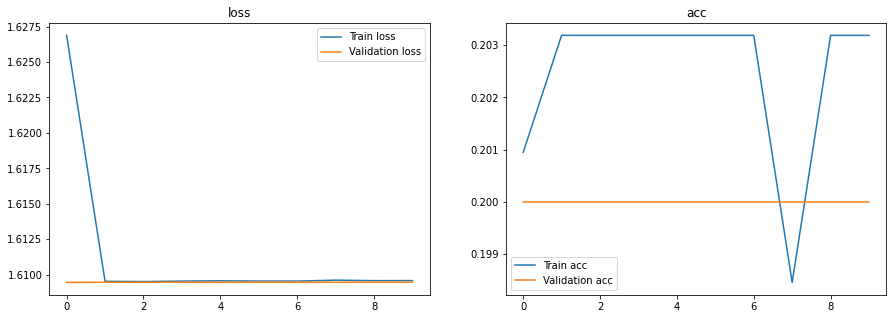

In [19]:
show_final_history(model1)

In [32]:
model_l1 = tf.keras.models.Sequential([
    # layer 1
    tf.keras.layers.Conv2D(2, (3,3), activation='relu', input_shape=(299, 299, 3), use_bias=True),
    tf.keras.layers.MaxPooling2D(2,2),
    # layer 2
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', use_bias=True),
    tf.keras.layers.MaxPooling2D(2,2),
    # layer 3
    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu', use_bias=True, kernel_regularizer =tf.keras.regularizers.l1( l=0.01) ),
    tf.keras.layers.MaxPooling2D(2,2),
    # layer 4
    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu', use_bias=True,kernel_regularizer =tf.keras.regularizers.l1( l=0.01)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    # layer 5
    tf.keras.layers.Dense(224, activation = 'relu', use_bias=True, kernel_regularizer =tf.keras.regularizers.l1( l=0.01)),
    # layer 6
    tf.keras.layers.Dense(5, activation='softmax', use_bias=True)
    
])

In [36]:
model_l1.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [37]:
model_l1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 297, 297, 2)       56        
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 148, 148, 2)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 146, 146, 64)      1216      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 71, 71, 128)       73856     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 35, 35, 128)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 33, 33, 128)      

In [38]:
history_l1 = model_l1.fit(train, epochs=20, validation_data = test, verbose = 1)

Epoch 1/20
126/126 [==============================] - 71s 554ms/step - loss: 49.3819 - accuracy: 0.1960 - val_loss: 11.9439 - val_accuracy: 0.2000
Epoch 2/20
126/126 [==============================] - 69s 550ms/step - loss: 11.2140 - accuracy: 0.1992 - val_loss: 11.5198 - val_accuracy: 0.2000
Epoch 3/20
126/126 [==============================] - 69s 545ms/step - loss: 11.2025 - accuracy: 0.2032 - val_loss: 11.4765 - val_accuracy: 0.2000
Epoch 4/20
126/126 [==============================] - 69s 551ms/step - loss: 11.1933 - accuracy: 0.2032 - val_loss: 11.1747 - val_accuracy: 0.2000
Epoch 5/20
126/126 [==============================] - 69s 548ms/step - loss: 11.1915 - accuracy: 0.1945 - val_loss: 11.8169 - val_accuracy: 0.2000
Epoch 6/20
126/126 [==============================] - 69s 552ms/step - loss: 11.2016 - accuracy: 0.2032 - val_loss: 11.4657 - val_accuracy: 0.2000
Epoch 7/20
126/126 [==============================] - 69s 550ms/step - loss: 11.1998 - accuracy: 0.2032 - val_loss: 11

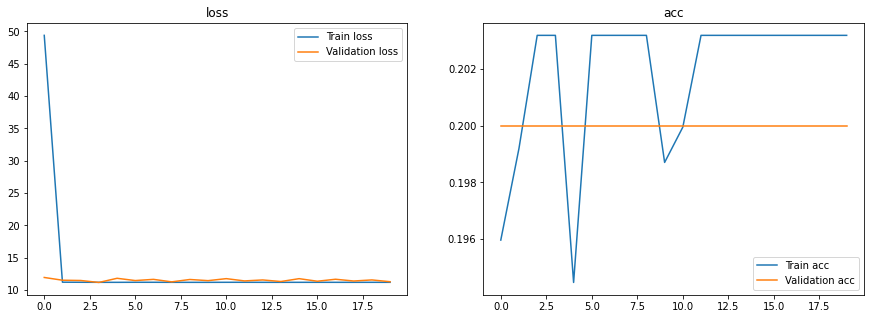

In [39]:
show_final_history(history_l1)

In [ ]:
# Since our original model is overfitting the data we will use Inception_V3 Pretrained model for feature learning

In [40]:
 !wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 #Downloading wieghts for Inception_V3 Model

--2021-06-18 14:59:44--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.128, 142.250.141.128, 2607:f8b0:4023:c0d::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  91.9MB/s    in 0.9s    

2021-06-18 14:59:46 (91.9 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [41]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
pre_trained_model = InceptionV3(
    input_shape=(299, 299, 3), include_top=False, weights=None)
pre_trained_model.load_weights(local_weights_file)

# We have kept incude_top = False as we will create the classification layer

In [42]:
for layer in pre_trained_model.layers:
  layer.trainable = False # We dont want to train our wieghts

In [43]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape:', last_layer.output_shape)
last_output = last_layer.output

last layer output shape: (None, 17, 17, 768)


In [44]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 100 hidden units and ReLU activation
x = layers.Dense(300, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(5, activation='softmax')(x)

# Configure and compile the model
model = Model(pre_trained_model.input, x)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [45]:
model2 = model.fit(train, batch_size=100, epochs = 15, validation_data=test) # Model is underfitting

Epoch 1/15
126/126 [==============================] - 89s 603ms/step - loss: 6.2125 - acc: 0.3133 - val_loss: 1.0886 - val_acc: 0.6083
Epoch 2/15
126/126 [==============================] - 74s 588ms/step - loss: 0.7046 - acc: 0.7837 - val_loss: 0.8538 - val_acc: 0.7022
Epoch 3/15
126/126 [==============================] - 73s 580ms/step - loss: 0.2432 - acc: 0.9566 - val_loss: 0.7403 - val_acc: 0.7369
Epoch 4/15
126/126 [==============================] - 73s 578ms/step - loss: 0.0831 - acc: 0.9941 - val_loss: 0.7267 - val_acc: 0.7589
Epoch 5/15
126/126 [==============================] - 73s 577ms/step - loss: 0.0266 - acc: 0.9997 - val_loss: 0.7723 - val_acc: 0.7545
Epoch 6/15
126/126 [==============================] - 73s 577ms/step - loss: 0.0156 - acc: 0.9998 - val_loss: 0.7805 - val_acc: 0.7589
Epoch 7/15
126/126 [==============================] - 73s 576ms/step - loss: 0.0126 - acc: 0.9997 - val_loss: 0.7743 - val_acc: 0.7653
Epoch 8/15
126/126 [==============================] - 7

In [46]:
test_image= image.load_img('/content/drive/MyDrive/FaceShape Dataset/Momina.jpg'
                           ,target_size =(299,299))

In [47]:
test_image = image.img_to_array(test_image)

In [48]:
test_image.shape

(299, 299, 3)

In [49]:
test_image=test_image.reshape(1,299, 299, 3)

In [51]:
result = model.predict(test_image)

In [52]:
np.around(result)

array([[0., 0., 0., 1., 0.]], dtype=float32)

In [53]:
result=result.argmax()

In [54]:
if result == 0:
    prediction = 'Heart'
elif result == 1:
    prediction = 'oblong'
elif result == 2:
    prediction = 'Oval'
elif result == 3:
    prediction = 'Round'
else:
   prediction = 'Square'

In [55]:
print(prediction)

Round
